In [2]:
%matplotlib inline

In [3]:
import skimage

# Images are numpy arrays

Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a grayscale image as a 2D array:

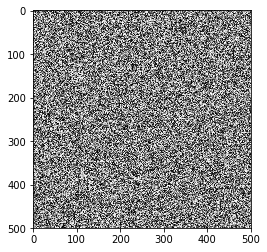

In [4]:
import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.random([500, 500])

plt.imshow(random_image, cmap='gray', interpolation='nearest');

The same holds for "real-world" images:

<class 'numpy.ndarray'> uint8 (303, 384)


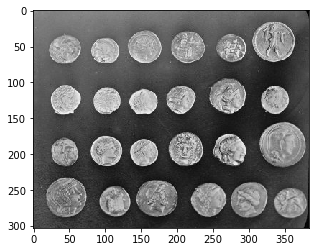

In [5]:
from skimage import data

coins = data.coins()

print(type(coins), coins.dtype, coins.shape)
plt.imshow(coins, cmap='gray', interpolation='nearest');

A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

In [1]:
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat, interpolation='nearest');

NameError: name 'data' is not defined

These are *just numpy arrays*. Making a red square is easy using just array slicing and manipulation:

In [ ]:
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat);

Images can also include transparent regions by adding a 4th dimension, called an *alpha layer*.

### Other shapes, and their meanings

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale|(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|

## Displaying images using matplotlib

In [ ]:
from skimage import data

img0 = data.chelsea()
img1 = data.rocket()

In [ ]:
import matplotlib.pyplot as plt

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img0)
ax0.set_title('Cameraman')

ax1.imshow(img1)
ax1.set_title('Rocket')
ax1.set_xlabel(r'Launching position $\alpha=320$')

ax1.vlines([202], 0, img1.shape[0], color='red', label='Side tower position')
ax1.plot([168, 190], [400, 200], color='white', linestyle='--', label='Side angle')

ax1.legend();

For more on plotting, see the [Matplotlib documentation](https://matplotlib.org/gallery/index.html#images-contours-and-fields) and [pyplot API](https://matplotlib.org/api/pyplot_summary.html).

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions--the choice is determined by the
data-type of the array.

E.g., here, I generate two valid images:

In [ ]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

The library is designed in such a way that any data-type is allowed as input,
as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes,
0-65535 for unsigned 16-bit integers).

This is achieved through the use of a few utility functions, such as ``img_as_float`` and ``img_as_ubyte``:

In [ ]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_float = img_as_float(image)
image_ubyte = img_as_ubyte(image)

print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())

print("231/255 =", 231/255.)

Your code would then typically look like this:

```python
def my_function(any_image):
   float_image = img_as_float(any_image)
   # Proceed, knowing image is in [0, 1]
```

We recommend using the floating point representation, given that
``scikit-image`` mostly uses that format internally.

## Image I/O

Mostly, we won't be using input images from the scikit-image example data sets.  Those images are typically stored in JPEG or PNG format.  Since scikit-image operates on NumPy arrays, *any* image reader library that provides arrays will do.  Options include matplotlib, pillow, imageio, imread, etc.

scikit-image conveniently wraps many of these in the `io` submodule, and will use whatever option is available:

In [ ]:
from skimage import io

image = io.imread('../images/balloon.jpg')

print(type(image))
print(image.dtype)
print(image.min(), image.max())
plt.imshow(image);

We also have the ability to load multiple images, or multi-layer TIFF images:

In [ ]:
ic = io.ImageCollection('../images/*.png:../images/*.jpg')

print('Type:', type(ic))

ic.files

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=len(ic) // 2, figsize=(20, 3))

for i, image in enumerate(ic):
    axes.flat[i].imshow(image, cmap='gray')
    axes.flat[i].axis('off')
    
plt.tight_layout()

## <span class="exercize">Exercise: draw the letter H</span>

Define a function that takes as input an RGB image and a pair of coordinates (row, column), and returns the image (optionally a copy) with green letter H overlaid at those coordinates. The coordinates should point to the top-left corner of the H.

The arms and strut of the H should have a width of 3 pixels, and the H itself should have a height of 24 pixels and width of 20 pixels.

Start with the following template:

In [ ]:
def draw_H(image, coords, color=(0, 255, 0), in_place=False):
    if in_place:
        out = image
    else:
        out = image.copy()
    
    # your code goes here
    
    return out

Test your function like so:

In [ ]:
cat = data.chelsea()
cat_H = draw_H(cat, (50, -50))
plt.imshow(cat_H);

## <span class="exercize">Exercise: RGB intensity plot</span>

Plot the intensity of each channel of the image along a given row.
Start with the following template:

In [ ]:
def plot_intensity(image, row):
    # Fill in the three lines below
    red_values = ...
    green_values = ...
    blue_values = ...
    
    plt.figure()
    plt.plot(red_values)
    plt.plot(green_values)
    plt.plot(blue_values)
    
    pass

Test your function here:

In [ ]:
plot_intensity(cat, 50)
plot_intensity(cat, 100)

## Exercise: Convert to black and white

The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminance is given by:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Use Python 3.5's matrix multiplication, `@`, to convert an RGB image to a grayscale luminance image.

Compare your results to that obtained with `skimage.color.rgb2gray`.

## A note on colormaps

If we plot a gray-scale image using the default colormap, "jet", and a gray-scale color
map, "gray", you can easily see the difference:

In [ ]:
fig, (ax_jet, ax_gray) = plt.subplots(1, 2, figsize=(10, 5))

ax_jet.imshow(image, cmap='jet')
ax_gray.imshow(image, cmap='gray');

We can get a better idea of the ill effects by zooming into the man's face.

In [ ]:
face = image[80:160, 200:280]
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2)
ax_jet.imshow(face, cmap='jet')
ax_gray.imshow(face, cmap='gray');

Notice how the face looks distorted and splotchy with the "jet" colormap. Also, this colormap distorts the concepts of light and dark, and there are artificial boundaries created by the different color hues. Is that a beauty mark on the man's upper lip? No, it's just an artifact of this ridiculous colormap.

Here's another example:

In [ ]:
X, Y = np.ogrid[-5:5:0.1, -5:5:0.1]
R = np.exp(-(X**2 + Y**2) / 15)

fig, (ax_jet, ax_gray) = plt.subplots(1, 2)
ax_jet.imshow(R, cmap='jet')
ax_gray.imshow(R, cmap='gray');

Woah!  See all those non-existing contours?

You can set both the method of interpolation and colormap used  explicitly in the ``imshow`` command:

In [ ]:
plt.imshow(R, cmap='gray', interpolation='nearest');

Otherwise, you can add the following setting at the top of any script
to change the default colormap:

In [ ]:
plt.rcParams['image.cmap'] = 'gray'

Don't worry: color images are unaffected by this change.

In addition, we'll set the interpolation to 'nearest neighborhood' so that it's easier to distinguish individual pixels in your image (the default is 'bicubic'--see the exploration below).

In [ ]:
plt.rcParams['image.interpolation'] = 'nearest'

For reference, let's look at the images above using Matplotlib's new 'viridis' and 'magma' colormaps (requires matplotlib >= 1.5).

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(R, cmap='jet')
axes[0, 1].imshow(R, cmap='viridis')
axes[1, 0].imshow(R, cmap='magma')
axes[1, 1].imshow(R, cmap='gray');

## Interactive demo: interpolation and color maps

In [ ]:
!pip install -q ipywidgets
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

If you installed ipywidgets for the first time, you will have to restart the Jupyter notebook server.

In [ ]:
from IPython.html.widgets import interact, fixed
from matplotlib import cm as colormaps
import matplotlib.colors
import inspect

@interact(image=fixed(face),
          cmap=sorted([c for c in dir(colormaps)
                       if not c.endswith('_r') and
                          isinstance(getattr(colormaps, c),
                                     matplotlib.colors.Colormap)],
                      key=lambda x: x.lower()),
          reverse_cmap=False,
          interpolation=['nearest', 'bilinear', 'bicubic',
                         'spline16', 'spline36', 'hanning', 'hamming',
                         'hermite', 'kaiser', 'quadric', 'catrom',
                         'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'])
def imshow_params(image, cmap='jet', reverse_cmap=False, interpolation='bicubic'):
    fig, axes = plt.subplots(1, 5, figsize=(15, 4))
    
    if reverse_cmap:
        cmap = cmap + '_r'
    
    axes[0].imshow(image, cmap='gray', interpolation='nearest')
    axes[0].set_title('Original')
    
    axes[1].imshow(image[:5, :5], cmap='gray', interpolation='nearest')
    axes[1].set_title('Top 5x5 block')
    axes[1].set_xlabel('No interpolation')

    axes[2].imshow(image, cmap=cmap, interpolation=interpolation)
    axes[2].set_title('%s colormap' % cmap)
    axes[2].set_xlabel('%s interpolation' % interpolation)
    
    axes[3].imshow(image[:5, :5], cmap=cmap, interpolation=interpolation)
    axes[3].set_title('%s colormap' % cmap)
    axes[3].set_xlabel('%s interpolation' % interpolation)
    
    axes[4].imshow(R, cmap=cmap, interpolation=interpolation)
    axes[4].set_title('%s colormap' % cmap)
    axes[4].set_xlabel('%s interpolation' % interpolation)
    
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

---

<div style="height: 400px;"></div>

In [ ]:
%reload_ext load_style
%load_style ../themes/tutorial.css